# EBAY FB pair 
### Entry Threshold:	2.00 | Exit Threshold:	0.50		
### Max Duration:	20 | MA Period:	60 | MA Type:	EMA	| StdDev Period:	60 | Sharpe Ratio:	1.678

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statsmodels
from pandas_datareader import data
import datetime
import quandl

In [2]:
start= datetime.datetime(2018, 1, 1)  # The start of the year for example
end= datetime.datetime(2019, 7, 30)

In [3]:
ticker_1 = "FB"
ticker_2 = "EBAY"

In [4]:
df_tickr1 = data.DataReader(name= ticker_1, data_source= "yahoo", start= start, end= end)
df_tickr2 = data.DataReader(name= ticker_2, data_source= "yahoo", start= start, end= end)

In [5]:
df_tickr1.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-24,204.809998,197.220001,197.630005,204.660004,32532500,204.660004
2019-07-25,208.660004,198.259995,206.699997,200.710007,39889900,200.710007
2019-07-26,202.880005,196.250000,200.190002,199.750000,24434000,199.750000
2019-07-29,199.630005,195.300003,199.000000,195.940002,16530800,195.940002
2019-07-30,198.710007,193.500000,195.389999,197.039993,11903600,197.039993


In [6]:
df_tickr2.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-24,41.180000,40.779999,40.869999,41.029999,6391500.0,40.888271
2019-07-25,41.150002,40.740002,41.040001,40.810001,5249000.0,40.669037
2019-07-26,41.389999,40.820000,40.930000,41.230000,8385600.0,41.087582
2019-07-29,41.650002,41.119999,41.279999,41.570000,7852000.0,41.426407
2019-07-30,41.500000,41.070000,41.299999,41.380001,6328000.0,41.237064


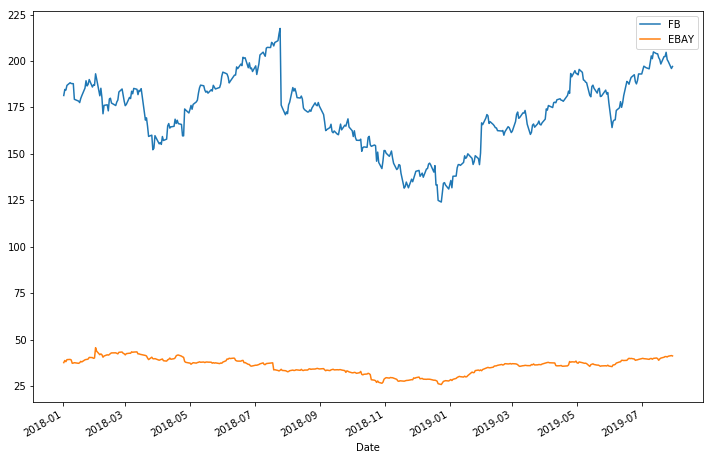

In [7]:
df_tickr1['Adj Close'].plot(label='{}'.format(ticker_1),figsize=(12,8))
df_tickr2['Adj Close'].plot(label='{}'.format(ticker_2))
plt.legend();

In [8]:
spread_ratio = df_tickr1['Adj Close']/df_tickr2['Adj Close']

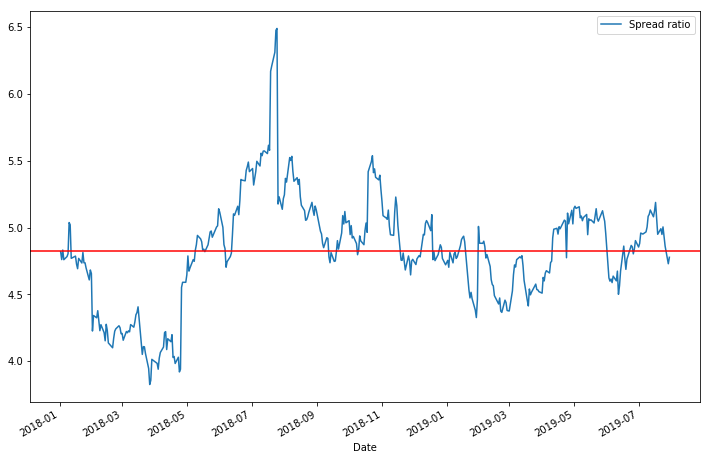

In [9]:
spread_ratio.plot(label='Spread ratio',figsize=(12,8))
plt.axhline(spread_ratio.mean(),c='r')
plt.legend();

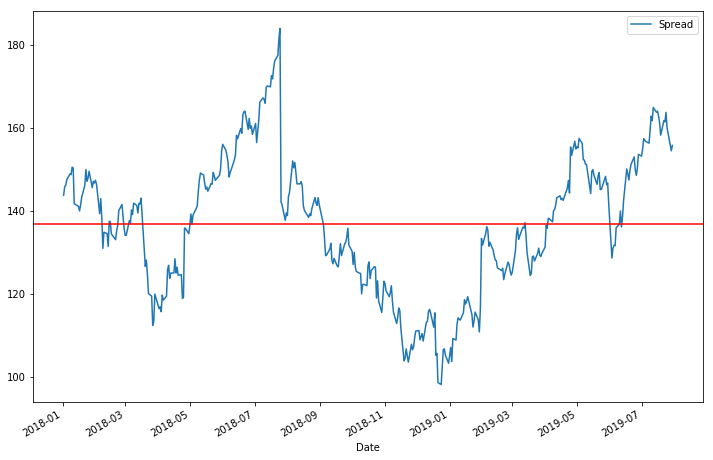

In [10]:
spread = df_tickr1['Adj Close'] - df_tickr2['Adj Close']
spread.plot(label='Spread',figsize=(12,8))
plt.axhline(spread.mean(),c='r')
plt.legend();

In [11]:
def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

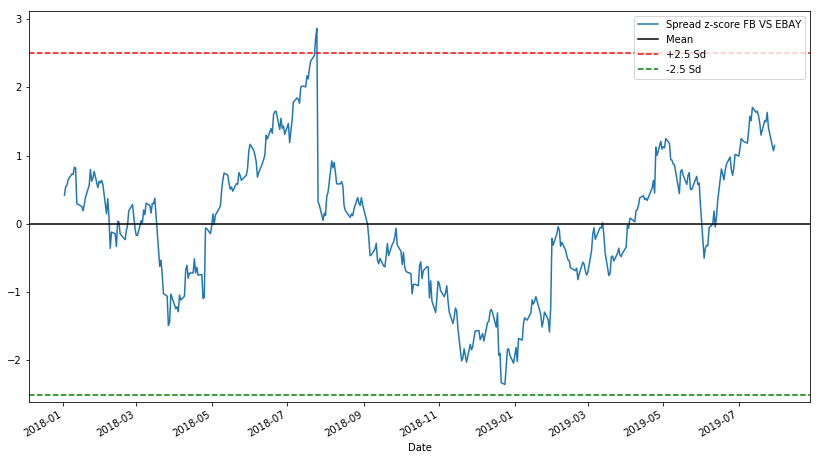

In [12]:
zscore(spread).plot(figsize=(14,8))
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(2.5, c='r', ls='--')
plt.axhline(-2.5, c='g', ls='--')
plt.legend(['Spread z-score {} VS {}'.format(ticker_1, ticker_2), 'Mean', '+2.5 Sd', '-2.5 Sd']);

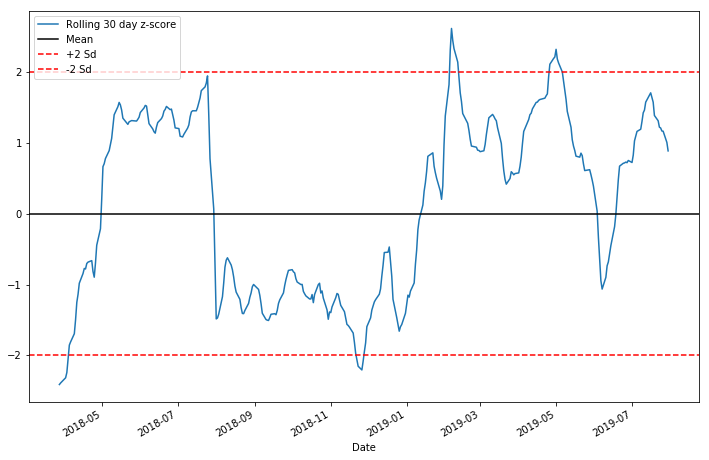

In [13]:
#1 day moving average of the price spread
spread_mavg1 = spread.rolling(5).mean()

# 30 day moving average of the price spread
spread_mavg30 = spread.rolling(60).mean()

# Take a rolling 30 day standard deviation
std_30 = spread.rolling(60).std()

# Compute the z score for each day
zscore_30_1 = (spread_mavg1 - spread_mavg30)/std_30



zscore_30_1.plot(figsize=(12,8),label='Rolling 30 day Z score')
plt.axhline(0, color='black')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(-2.0, color='red',linestyle='--')
plt.legend(['Rolling 30 day z-score', 'Mean', '+2 Sd', '-2 Sd']);

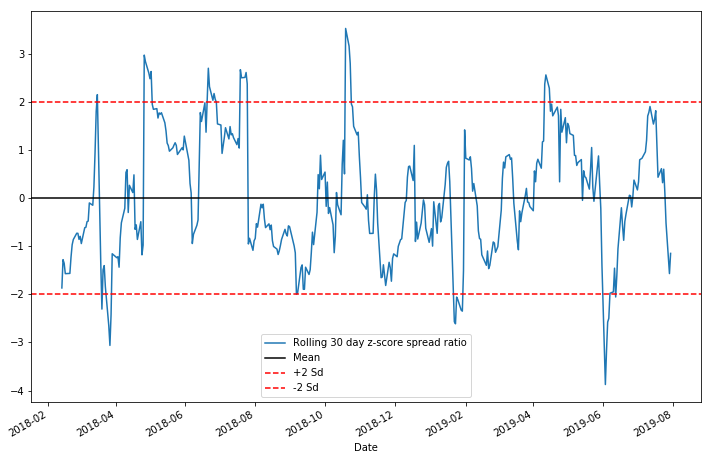

In [14]:
#1 day moving average of the price spread
spreadratio_mavg1 = spread_ratio.rolling(1).mean()

# 30 day moving average of the price spread
spreadratio_mavg30 = spread_ratio.rolling(30).mean()

# Take a rolling 30 day standard deviation
std_30ratio = spread_ratio.rolling(30).std()

# Compute the z score for each day
zscore_30_1_ratio = (spreadratio_mavg1 - spreadratio_mavg30)/std_30ratio



zscore_30_1_ratio.plot(figsize=(12,8),label='Rolling 30 day Z score for spread ratio')
plt.axhline(0, color='black')
plt.axhline(2.00, color='red', linestyle='--')
plt.axhline(-2.00, color='red',linestyle='--')
plt.legend(['Rolling 30 day z-score spread ratio', 'Mean', '+2 Sd', '-2 Sd']);

In [15]:
from statsmodels.tsa.stattools import coint

In [16]:
y0 = df_tickr1['Adj Close']
y1 = df_tickr2['Adj Close']

In [17]:
t_stat_summary = statsmodels.tsa.stattools.coint(y0, y1, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=True) 

In [18]:
print('----------------------------------------')
print('T-stat for the pair {} VS {}:'.format(ticker_1,ticker_2), t_stat_summary[0])
print('Alpha value for the T-stat:  {}'.format(t_stat_summary[1]))
print('--------------------------------------')
print('T-stat 99%:  {}'.format(t_stat_summary[2][0]))
print('T-stat 95%:  {}'.format(t_stat_summary[2][1]))
print('T-stat 90%:  {}'.format(t_stat_summary[2][2]))

----------------------------------------
T-stat for the pair FB VS EBAY: -2.8510746058607563
Alpha value for the T-stat:  0.1499736564000051
--------------------------------------
T-stat 99%:  -3.924381211344336
T-stat 95%:  -3.3516423377663833
T-stat 90%:  -3.0552046482935427


In [19]:
from statsmodels.tsa.stattools import adfuller
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is mean-reverting")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-mean-reverting ")
    
    print("Dickey Fuller Confidence Intervals:  ", adfuller(spread_ratio)[4])

adf_check(spread_ratio)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -2.9872954673959864
p-value : 0.03609799807354587
#Lags Used : 0
Number of Observations Used : 395
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is mean-reverting
Dickey Fuller Confidence Intervals:   {'1%': -3.447014064067954, '5%': -2.8688850015516016, '10%': -2.5706826870693797}


In [20]:
np.corrcoef(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[1.        , 0.70117331],
       [0.70117331, 1.        ]])

In [21]:
np.cov(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[365.98993328,  56.30537729],
       [ 56.30537729,  17.61894333]])

# Differencing method of spread; GARCH volatility method of spread and final use log returns minus average log returns of spread over GARCH - to be done next

In [22]:
zscore_30_1_ratio

Date
2018-01-02         NaN
2018-01-03         NaN
2018-01-04         NaN
2018-01-05         NaN
2018-01-08         NaN
2018-01-09         NaN
2018-01-10         NaN
2018-01-11         NaN
2018-01-12         NaN
2018-01-16         NaN
2018-01-17         NaN
2018-01-18         NaN
2018-01-19         NaN
2018-01-22         NaN
2018-01-23         NaN
2018-01-24         NaN
2018-01-25         NaN
2018-01-26         NaN
2018-01-29         NaN
2018-01-30         NaN
2018-01-31         NaN
2018-02-01         NaN
2018-02-02         NaN
2018-02-05         NaN
2018-02-06         NaN
2018-02-07         NaN
2018-02-08         NaN
2018-02-09         NaN
2018-02-12         NaN
2018-02-13   -1.868139
                ...   
2019-06-18   -0.576916
2019-06-19   -0.878143
2019-06-20   -0.488809
2019-06-21   -0.337820
2019-06-24    0.057188
2019-06-25    0.046174
2019-06-26   -0.185587
2019-06-27    0.026521
2019-06-28    0.372396
2019-07-01    0.168096
2019-07-02    0.341523
2019-07-03    0.794907
2019-0

In [23]:
spread_ratio

Date
2018-01-02    4.819784
2018-01-03    4.761020
2018-01-04    4.832342
2018-01-05    4.760178
2018-01-08    4.783352
2018-01-09    4.805536
2018-01-10    5.037997
2018-01-11    5.021469
2018-01-12    4.770335
2018-01-16    4.787081
2018-01-17    4.726992
2018-01-18    4.692899
2018-01-19    4.769959
2018-01-22    4.735598
2018-01-23    4.814165
2018-01-24    4.737020
2018-01-25    4.736844
2018-01-26    4.698375
2018-01-29    4.609112
2018-01-30    4.683279
2018-01-31    4.656775
2018-02-01    4.226910
2018-02-02    4.343108
2018-02-05    4.325683
2018-02-06    4.378928
2018-02-07    4.303973
2018-02-08    4.229434
2018-02-09    4.274408
2018-02-12    4.214915
2018-02-13    4.153709
                ...   
2019-06-18    4.767413
2019-06-19    4.688010
2019-06-20    4.764202
2019-06-21    4.789077
2019-06-24    4.866975
2019-06-25    4.856344
2019-06-26    4.803839
2019-06-27    4.839828
2019-06-28    4.903012
2019-07-01    4.855076
2019-07-02    4.882133
2019-07-03    4.959487
2019-0